<a href="https://colab.research.google.com/github/KEDAR30/Data_Science_Exam_Q.2/blob/main/Epilepsy_Classfication_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df[['MDVP:PPQ','Jitter:DDP']].describe()

,MDVP:PPQ,Jitter:DDP
count,193.000000,194.000000
mean,0.003468,0.009932
std,0.002765,0.008925
min,0.000920,0.002040
25%,0.001880,0.004982
50%,0.002700,0.007455
75%,0.003960,0.011558
max,0.019580,0.064330


In [5]:
df[df['MDVP:PPQ'].isnull()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
32,phon_R01_S07_3,198.383,215.203,193.104,0.00212,0.00001,0.00113,NaN,0.00339,0.01263,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,NaN,0.00408,0.01745,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546


In [6]:
df.corrwith(df['MDVP:PPQ'])

MDVP:Fo(Hz)        -0.102445
MDVP:Fhi(Hz)        0.094039
MDVP:Flo(Hz)       -0.090119
MDVP:Jitter(%)      0.974116
MDVP:Jitter(Abs)    0.897232
MDVP:RAP            0.957104
MDVP:PPQ            1.000000
Jitter:DDP          0.957123
MDVP:Shimmer        0.796648
MDVP:Shimmer(dB)    0.838311
Shimmer:APQ3        0.762234
Shimmer:APQ5        0.785771
MDVP:APQ            0.802967
Shimmer:DDA         0.762247
NHR                 0.844120
HNR                -0.731772
status              0.280344
RPDE                0.328858
DFA                 0.196105
spread1             0.714968
spread2             0.403919
D2                  0.408078
PPE                 0.768396
dtype: float64

In [7]:
temp_x = df[['MDVP:Jitter(%)','MDVP:RAP']].drop([32,65])
temp_y = df['MDVP:PPQ'].drop([32,65])

In [8]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
lr = LinearRegression()
lr.fit(temp_x,temp_y)

LinearRegression()

In [10]:
pp_pred = np.round(lr.predict(df[['MDVP:Jitter(%)','MDVP:RAP']].iloc[[32,65]]),5).tolist()

In [11]:
df['MDVP:PPQ'].iloc[[32,65]] = pp_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df[df['Jitter:DDP'].isnull()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
26,phon_R01_S06_3,171.041,208.313,75.501,0.00455,0.00003,0.0025,0.00234,NaN,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.18359,0.226278,2.589702,0.147403


In [13]:
df.corrwith(df['Jitter:DDP'])

MDVP:Fo(Hz)        -0.075688
MDVP:Fhi(Hz)        0.097345
MDVP:Flo(Hz)       -0.102061
MDVP:Jitter(%)      0.990285
MDVP:Jitter(Abs)    0.922909
MDVP:RAP            1.000000
MDVP:PPQ            0.957272
Jitter:DDP          1.000000
MDVP:Shimmer        0.759508
MDVP:Shimmer(dB)    0.790576
Shimmer:APQ3        0.744956
Shimmer:APQ5        0.709805
MDVP:APQ            0.737325
Shimmer:DDA         0.744963
NHR                 0.919522
HNR                -0.721899
status              0.267725
RPDE                0.341586
DFA                 0.064111
spread1             0.648159
spread2             0.324435
D2                  0.427729
PPE                 0.670958
dtype: float64

In [14]:
temp_x = df[['MDVP:RAP']].drop(26)
temp_y = df['Jitter:DDP'].drop(26)
lr = LinearRegression()
lr.fit(temp_x,temp_y)
dd_pred = np.round(lr.predict(df[['MDVP:RAP']].iloc[[26]]),5).tolist()
df['Jitter:DDP'].iloc[[26]] = dd_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003444,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002761,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [16]:
import plotly.express as pl
pl.histogram(df,x='status',color='status',text_auto=True,title='Count of status')

In [17]:
pl.histogram(df,'MDVP:Fo(Hz)',color='status',barmode='group',text_auto=True,title="'MDVP:Fo(hz)' frequency distribution")

In [18]:
pl.histogram(df,'Jitter:DDP',color='status',barmode='group',text_auto=True,title="'Jitter:DDP' frequency distribution")

In [19]:
hov_data = df.columns.to_list()
pl.bar(df,x='name',y='MDVP:Shimmer',color='status',hover_data=hov_data,title="'MDVP:Shimmer' of each individual with additional data")

In [20]:
# Featuring Engginering
target = df['status']
df.drop(['name','status'],axis=1,inplace=True)

In [21]:
ms = MinMaxScaler()

In [22]:
ms.fit(df)
df = ms.transform(df)

In [23]:
df = pd.DataFrame(df,columns=ms.feature_names_in_)

In [24]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.135246,0.126504,0.184126,0.162080,...,0.129347,0.214101,0.077019,0.546410,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147970,0.142934,0.172147,0.160129,...,0.129771,0.195527,0.128652,0.179865,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.050375,0.047279,0.063584,0.052177,...,0.045103,0.071222,0.016790,0.437170,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.094855,0.087494,0.122604,0.111750,...,0.084769,0.158685,0.035045,0.554499,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.170074,0.302703,0.079543,0.676034,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


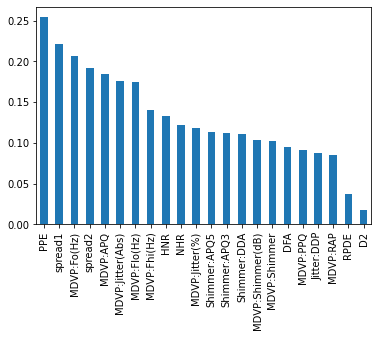

In [25]:
# Feature Selection
imports= mutual_info_classif(df,target)
fea_imp = pd.Series(imports,df.columns[0:len(df.columns)])
fea_imp.sort_values(ascending=False,inplace=True)
fea_imp.plot(kind='bar')
plt.show()

In [26]:
features = fea_imp[:10].index.tolist()
X = df[features]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,target,
                                                 test_size=0.2,
                                                 random_state=5)

In [28]:
models = [DecisionTreeClassifier(random_state=5),RandomForestClassifier(random_state=5),LogisticRegression(),GaussianNB(),SVC()]

In [29]:
for model in models:
    model.fit(X_train,y_train)
    print('Scores for',model,':\n')
    print('Train:',model.score(X_train,y_train))
    print('Test:',model.score(X_test,y_test),'\n')

Scores for DecisionTreeClassifier(random_state=5) :

Train: 1.0
Test: 0.9230769230769231 

Scores for RandomForestClassifier(random_state=5) :

Train: 1.0
Test: 0.8974358974358975 

Scores for LogisticRegression() :

Train: 0.8782051282051282
Test: 0.8205128205128205 

Scores for GaussianNB() :

Train: 0.7756410256410257
Test: 0.7948717948717948 

Scores for SVC() :

Train: 0.9038461538461539
Test: 0.8461538461538461 



In [30]:
# Random Forest Classificer
params = {'criterion':['gini','entropy'],
         'max_depth':[20,19,18,17,16,15,14,13],
         'n_estimators':[100,200,300]}


In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=5),param_grid=params,cv=3,verbose=1)

In [33]:
grid_cv.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 19, 18, 17, 16, 15, 14, 13],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [34]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}

In [35]:
RF = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=20,random_state=5)

In [36]:
RF.fit(X_train,y_train)
print('Scores:')
print('Train:',RF.score(X_train,y_train))
print('Test:',RF.score(X_test,y_test))

Scores:
Train: 1.0
Test: 0.9487179487179487


In [37]:
# Decsion Tree Classificer
param_grid={
    'max_depth':[20,19,18,17,15,14,13,12,11,10],
    'max_features':['sqrt','log2']
}
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=5),param_grid=param_grid,cv=5,verbose=1)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [20, 19, 18, 17, 15, 14, 13, 12, 11, 10],
                         'max_features': ['sqrt', 'log2']},
             verbose=1)

In [38]:
grid_cv.best_params_

{'max_depth': 20, 'max_features': 'sqrt'}

In [39]:
DT = DecisionTreeClassifier(max_depth=20,max_features='sqrt',random_state=5)
DT.fit(X_train,y_train)
print('Scores :\n')
print('Train:',DT.score(X_train,y_train))
print('Test: ',DT.score(X_test,y_test))

Scores :

Train: 1.0
Test:  0.8974358974358975


In [40]:
# Cofustion Matrix
con_mat = confusion_matrix(y_test,RF.predict(X_test))

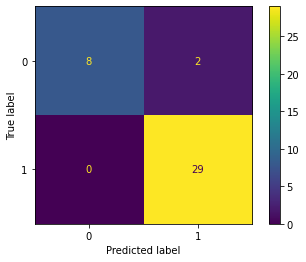

In [41]:
ConfusionMatrixDisplay(con_mat).plot()
plt.show()

Scores:
Train: 1.0
Test:  0.9743589743589743


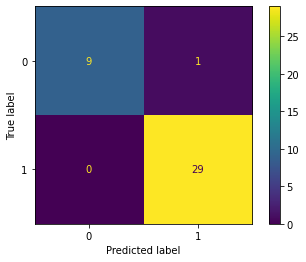

In [42]:
# Decision Tree using all features
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=0.2,random_state=5)
DT = DecisionTreeClassifier(max_depth=20,max_features='sqrt',random_state=5)
DT.fit(X_train,y_train)
print('Scores:')
print('Train:',DT.score(X_train,y_train))
print('Test: ',DT.score(X_test,y_test))
con_mat = confusion_matrix(y_test,DT.predict(X_test))
ConfusionMatrixDisplay(con_mat).plot()